In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgba2rgb
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
from skimage import io, color
import cv2 
import cv2
from scipy.signal import medfilt2d

from keras.preprocessing.image import ImageDataGenerator

In [12]:
#fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train/ang20190922t192642_ang20190922t192642-2_r4578_c217-plume.png"
fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Test/01A.png"
#fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train2A/ang20200708t192518-3_r1823_c108_ctr.tif"

In [13]:
def read_image(image_filename):
    return cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE) 

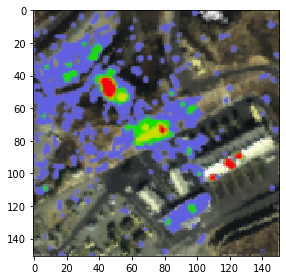

In [14]:
chico = imread(fil)
#img = read_image(fil)
#chico = cv2.imread(fil, cv2.IMREAD_COLOR)
imshow(chico)

In [49]:
chico = chico.reshape(1, 217, 217, 4)

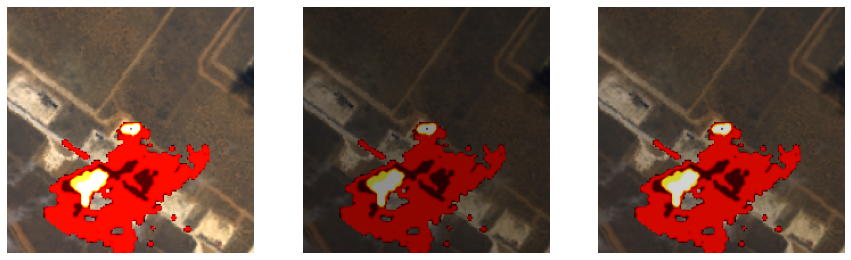

In [70]:
# ImageDataGenerator brightness
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])

# iterator
aug_iter = datagen.flow(chico, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

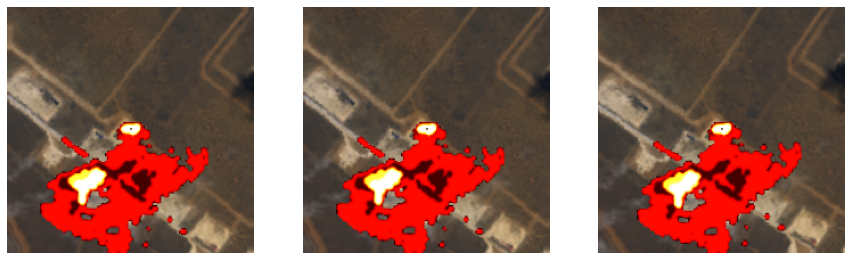

In [61]:

# ImageDataGenerator rotation
datagen = ImageDataGenerator(rotation_range=5, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(chico, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

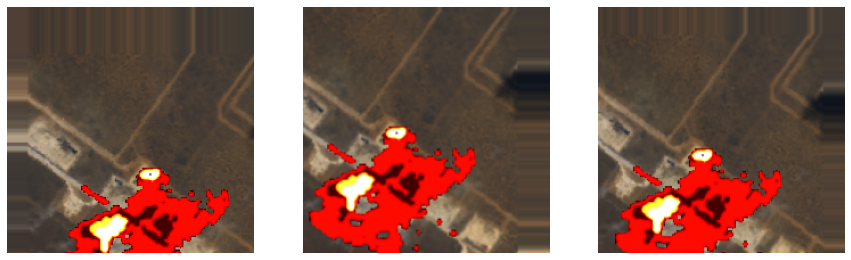

In [64]:
# ImageDataGenerator shifting
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# iterator
aug_iter = datagen.flow(chico, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

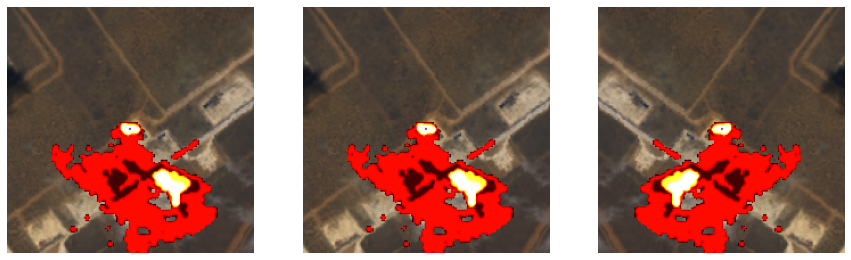

In [67]:

# ImageDataGenerator flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# iterator
aug_iter = datagen.flow(chico, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

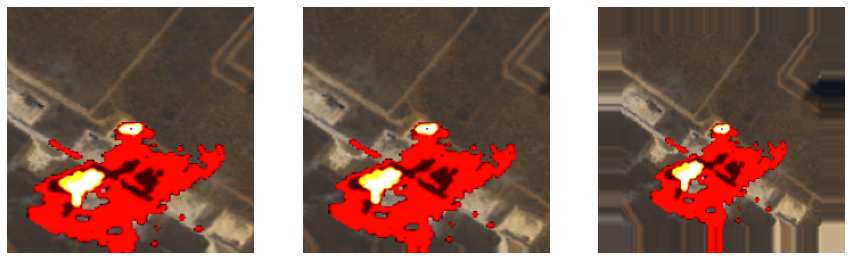

In [57]:

# ImageDataGenerator zoom
datagen = ImageDataGenerator(zoom_range=0.3)

# iterator
aug_iter = datagen.flow(chico, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


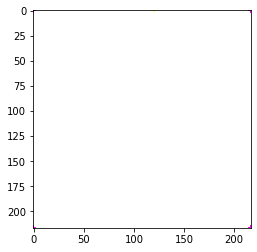

In [15]:
img = (img / np.max(img)) * 255

test = np.cumsum(img, axis = 0) + np.cumsum(img, axis = 1) + np.flipud(np.cumsum(np.flipud(img), axis = 0)) + np.fliplr(np.cumsum(np.fliplr(img), axis = 1))

img_c = test/np.max(test)
img_c = (img_c - np.min(img_c))
img_c = (img_c / np.max(img_c)) * 255

img_m = medfilt2d(img, 7)

img_rgb = np.expand_dims(img, axis = 2)
img_m2 = np.expand_dims(img_m, axis = 2)
img_c2 = np.expand_dims(img_c, axis = 2)

img_rgb2 = np.concatenate((img_rgb, img_m2, img_c2), axis = 2)

plt.imshow(img_rgb2)
plt.show()

In [21]:
img_rgb2

array([[[ 66.        ,   0.        ,  63.57832512],
        [ 65.        ,   0.        ,  66.30837438],
        [ 64.        ,   0.        ,  68.73694581],
        ...,
        [ 66.        ,   0.        ,   5.96256158],
        [ 61.        ,   0.        ,   6.74975369],
        [ 59.        ,   0.        ,   7.97241379]],

       [[ 67.        ,   0.        ,  63.34384236],
        [ 66.        ,  59.        ,  66.07389163],
        [ 64.        ,  60.        ,  68.46896552],
        ...,
        [ 61.        ,  58.        ,   5.5270936 ],
        [ 58.        ,  58.        ,   6.38128079],
        [ 58.        ,   0.        ,   7.67093596]],

       [[ 67.        ,   0.        ,  64.96847291],
        [ 64.        ,  60.        ,  67.63152709],
        [ 61.        ,  61.        ,  69.99310345],
        ...,
        [ 60.        ,  59.        ,   7.1182266 ],
        [ 58.        ,  58.        ,   8.00591133],
        [ 58.        ,   0.        ,   9.2955665 ]],

       ...,

      

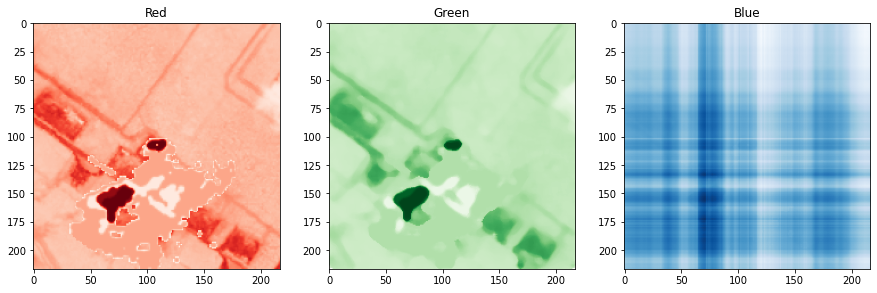

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(img_rgb2[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(img_rgb2[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(img_rgb2[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

(217, 217)


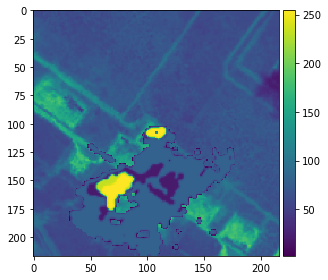

In [8]:
img = (img / np.max(img)) * 255
# img = img[:,:,0]

print(img.shape)
imshow(img)

0.0


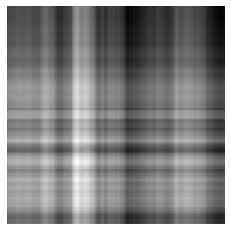

In [9]:
test = np.cumsum(img, axis = 0) + np.cumsum(img, axis = 1) + np.flipud(np.cumsum(np.flipud(img), axis = 0)) + np.fliplr(np.cumsum(np.fliplr(img), axis = 1))

img_c = test/np.max(test)
img_c = (img_c - np.min(img_c))
img_c = (img_c / np.max(img_c)) * 255

print(np.min(img_c))
plt.imshow(img_c, cmap = "gray")
plt.axis('off')
plt.show()

255.0


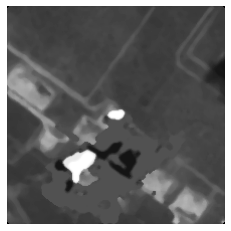

In [29]:
img_m = medfilt2d(img, 5)

print(np.max(img_m))

plt.imshow(img_m, cmap = "gray")
plt.axis('off')
plt.show()

255.0


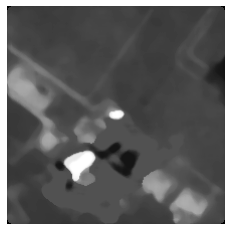

In [30]:
img_m = medfilt2d(img, 9)

print(np.max(img_m))

plt.imshow(img_m, cmap = "gray")
plt.axis('off')
plt.show()

In [11]:
img_rgb = np.expand_dims(img, axis = 2)
img_m2 = np.expand_dims(img_m, axis = 2)
img_c2 = np.expand_dims(img_c, axis = 2)

In [12]:
img_rgb2 = np.concatenate((img_rgb, img_m2, img_c2), axis = 2)

img_rgb2.shape

(217, 217, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


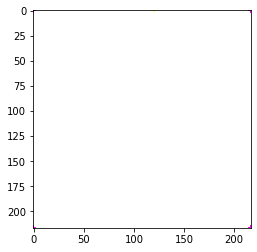

In [14]:
plt.imshow(img_rgb2)
plt.show()

In [ ]:
# Normalize image
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Calculate cumulative sums
cum_sum = np.cumsum(img, axis = 0) + np.cumsum(img, axis = 1) + np.flipud(np.cumsum(np.flipud(img), axis = 0)) + np.fliplr(np.cumsum(np.fliplr(img), axis = 1))

# Average the four directions
cum_sum_avg = cum_sum / 4

In [ ]:
imshow(img)

In [ ]:
imshow(cum_sum)

In [ ]:
# Apply median filter
med_filtered = medfilt2d(cum_sum_avg, kernel_size=3)

In [ ]:
imshow(med_filtered)

In [ ]:
img.shape

In [ ]:
img = (img / np.max(img)) * 255

In [ ]:
imshow(img)

In [ ]:
test = np.cumsum(img, axis = 0) + np.cumsum(img, axis = 1) + np.flipud(np.cumsum(np.flipud(img), axis = 0)) + np.fliplr(np.cumsum(np.fliplr(img), axis = 1))

img_c = test/np.max(test)
img_c = (img_c - np.min(img_c))
img_c = (img_c / np.max(img_c)) * 255

print(np.min(img_c))
plt.imshow(img_c, cmap = "gray")
plt.axis('off')
plt.show()

In [ ]:
img_m = medfilt2d(img, 7)

print(np.max(img_m))

plt.imshow(img_m, cmap = "gray")
plt.axis('off')
plt.show()

In [ ]:
img.shape

In [ ]:
img_rgb = np.expand_dims(img, axis = 2)
img_m2 = np.expand_dims(img_m, axis = 2)
img_c2 = np.expand_dims(img_c, axis = 2)

In [ ]:
imshow(img_c2)

In [ ]:
img_rgb = np.concatenate((img_rgb, img_m2, img_c2), axis = 2)

img_rgb.shape

In [ ]:
imshow(img_rgb)

In [ ]:
img_rgb

In [ ]:
chico.shape

In [ ]:
# Function to read and normalize input image
def read_norm_image(img):
    # Normalize image
    img = (img / np.max(img)) * 255
    return img

In [ ]:
chico = read_norm_image(chico)
imshow(chico)

In [ ]:
test = np.cumsum(chico, axis = 0) + np.cumsum(chico, axis = 1) + np.flipud(np.cumsum(np.flipud(chico), axis = 0)) + np.fliplr(np.cumsum(np.fliplr(chico), axis = 1))

img_c = test/np.max(test)
img_c = (chico - np.min(chico))
img_c = (chico / np.max(chico)) * 255

In [ ]:
imshow(img_c)

In [ ]:
img_c_filtered = medfilt2d(img_c, kernel_size=3)

In [15]:
chico = (chico / np.max(chico)) * 255

In [16]:
chico_rgb = color.rgba2rgb(chico)
chico_hsv = rgb2hsv(chico_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


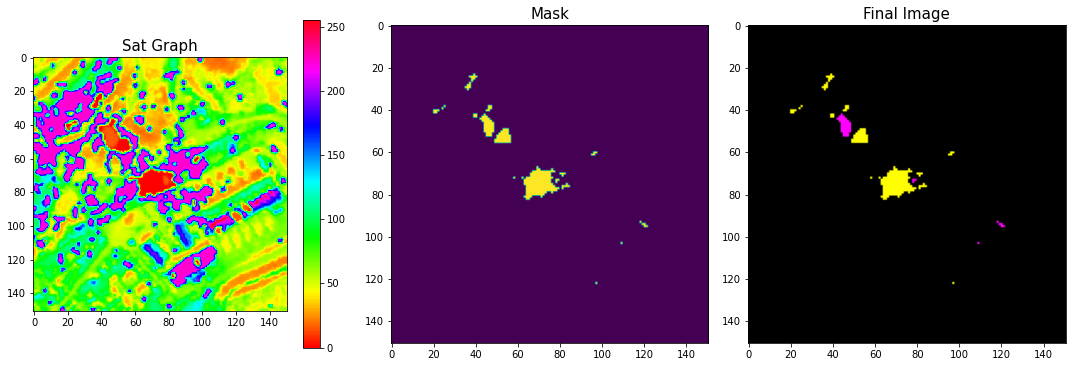

In [33]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
im = ax[0].imshow(chico[:,:,2],cmap='hsv')
fig.colorbar(im,ax=ax[0])
ax[0].set_title('Sat Graph',fontsize=15)
#set the lower and upper mask based on hue colorbar value of the desired fruit
#upper_mask = chico_hsv[:,:,0] > 0.01
lower_mask = chico_hsv[:,:,1] > 0
mask = lower_mask
# get the desired mask and show in original image
red = chico[:,:,0]*mask
green = chico[:,:,1]*mask
blue = chico[:,:,2]*mask
mask2 = np.dstack((red,green,blue))
ax[1].imshow(mask)
ax[2].imshow(mask2)
ax[1].set_title('Mask',fontsize=15)
ax[2].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


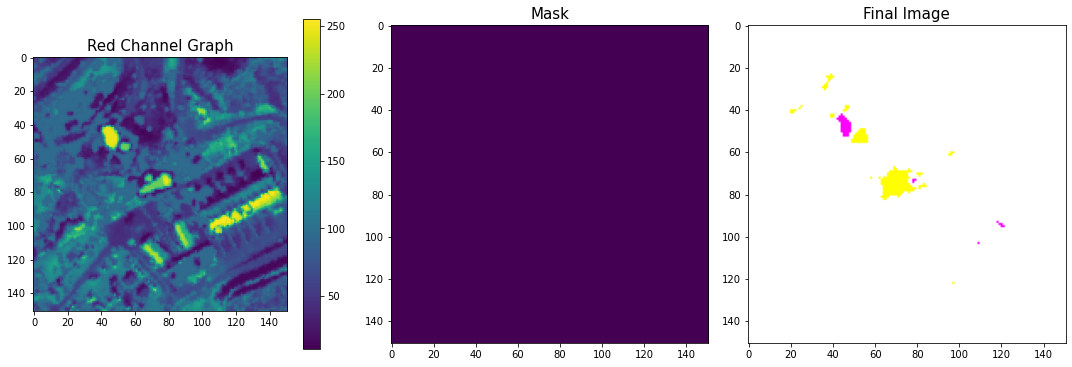

In [20]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
im = ax[0].imshow(chico[:,:,0])
fig.colorbar(im,ax=ax[0])
ax[0].set_title('Red Channel Graph',fontsize=15)
#set the lower and upper mask based on hue colorbar value of the desired fruit
#upper_mask = chico_hsv[:,:,2] > 0.78
lower_mask = chico_rgb[:,:,0] > 0.9
green_mask = chico_rgb[:,:,1] > 0.85
blue_mask = chico_rgb[:,:,2] > 0.45
mask = lower_mask+green_mask+blue_mask
# get the desired mask and show in original image
red = chico[:,:,0]*mask
green = chico[:,:,1]*green_mask
blue = chico[:,:,2]*blue_mask
mask2 = np.dstack((red,green,blue))
ax[1].imshow(mask)
ax[2].imshow(mask2)
ax[1].set_title('Mask',fontsize=15)
ax[2].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

C:\Users\vasan\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


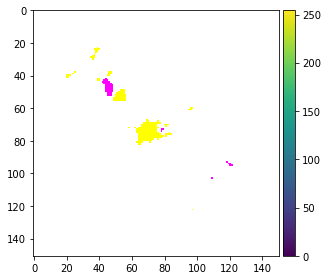

In [11]:
imshow(chico);

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(chico[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(chico[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

In [ ]:
imshow(blue)

In [ ]:
imshow(red)

In [ ]:
red

In [ ]:
mask2.mean()

In [ ]:
chico.mean()

In [ ]:
chico.shape

In [ ]:
feature_matrix = np.zeros((217,217))

In [ ]:
for i in range(0,chico.shape[0]):
    for j in range(0,chico.shape[1]):
        feature_matrix[i][j] = ((int(chico[i,j,0]) + int(chico[i,j,1]) + int(chico[i,j,2]))/3)

In [ ]:
feature_matrix.mean()

In [ ]:
feature_matrix2 = np.zeros((217,217))

In [ ]:
for i in range(0,chico.shape[0]):
    for j in range(0,chico.shape[1]):
        feature_matrix2[i][j] = ((int(mask2[i,j,0]) + int(mask2[i,j,1]) + int(mask2[i,j,2]))/3)

In [ ]:
feature_matrix2.mean()

In [ ]:
# Split image into channels
b, g, r = cv2.split(mask2)

# Print the shape of each channel
print("Blue channel shape:", b.shape)
print("Green channel shape:", g.shape)
print("Red channel shape:", r.shape)

In [ ]:
r

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(mask2[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(mask2[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(mask2[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

In [ ]:
mask3 = np.where(mask2 == 0, np.nan, mask2)

In [ ]:
np.nanmean(mask3)

In [ ]:
feature_matrix3 = np.where(feature_matrix2 == 0, np.nan, feature_matrix2)

In [ ]:
np.nanmean(feature_matrix3)

In [ ]:
def image_processing(fil):
#Open image and import it as a numpy array
    image2 = imread(fil)
    
    feature_matrix = np.zeros((217,217))
    
    for i in range(0,image2.shape[0]):
        for j in range(0,image2.shape[1]):
            feature_matrix[i][j] = ((int(image2[i,j,0]) + int(image2[i,j,1]) + int(image2[i,j,2]))/3)
        
    features = np.reshape(feature_matrix, (217*217))
    
    return features

In [ ]:
feature_matrix = np.zeros((217,217))

In [ ]:
for i in range(0,chico.shape[0]):
    for j in range(0,chico.shape[1]):
        feature_matrix[i][j] = ((int(chico[i,j,0]) + int(chico[i,j,1]) + int(chico[i,j,2]))/3)

In [ ]:
mask2a=image_processing(mask2)

In [ ]:
features = np.reshape(feature_matrix, (217*217))

In [ ]:
features

In [ ]:
features.shape

In [ ]:
chico

In [ ]:
fil2 = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Test/03A.png"

In [ ]:
chico2 = imread(fil2)
imshow(chico2);

In [ ]:
chico2_rgb = color.rgba2rgb(chico2)
chico2_hsv = rgb2hsv(chico2_rgb)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
im = ax[0].imshow(chico2[:,:,2],cmap='hsv')
fig.colorbar(im,ax=ax[0])
ax[0].set_title('Sat Graph',fontsize=15)
#set the lower and upper mask based on hue colorbar value of the desired fruit
#upper_mask = chico_hsv[:,:,2] > 0.7
lower_mask = chico2_hsv[:,:,1] > 0.4
mask = lower_mask
# get the desired mask and show in original image
red = chico2[:,:,0]*mask
green = chico2[:,:,1]*mask
blue = chico2[:,:,2]*mask
mask2 = np.dstack((red,green,blue))
ax[1].imshow(mask)
ax[2].imshow(mask2)
ax[1].set_title('Mask',fontsize=15)
ax[2].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
mask3 = rgb2gray(mask2)

In [ ]:
imshow(mask3)

In [ ]:
mask3.shape

In [ ]:
img_reshaped = np.reshape(mask3, (mask3.shape[0] * img.shape[1], 3))

In [ ]:
mask3

In [ ]:
image_arr = mask3.flatten()

In [ ]:
image_arr

In [ ]:
mean_value = np.mean(image_arr)

In [ ]:
mean_value

In [ ]:
b, g, r = cv2.split(mask2)

In [ ]:
mean = np.mean(b)
mean

In [ ]:
mean = np.mean(g)
mean

In [ ]:
mean = np.mean(r)
mean